# Adult Income Exercise

For this exercise we will use a dataset that contains some features about people and we need to predict <b>if each person is payed more than 50.000 $ annualy or not</b>.

- You need to:
    - Explore the dataset
    - Give some basic information about the data
    - Preprocess the data (missing values, imputation...)
    - Test various Machine Learning algorithms
    - Evaluate the performance of these algorithms over the test data in terms of Accuracy, Precision, Recall, F1, plot the confusion matrix...
    - Chose one of these algorithms to perfom the task prediction and explain why (in comments or in a markdown cell)



In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import bisect
from sklearn.metrics import ConfusionMatrixDisplay

# Read in the data
df = pd.read_csv('adult.csv')

# fnlwgt is a weight variable that represents the demographic characteristics of each person surveyed.
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Data Analysis

### 1. Missing Values

Check if the dataset contain any missing values.

In [128]:
# Look for missing values
df.isna().sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### 2. Distribution of the target variable

Plot the distribution of the target variable.

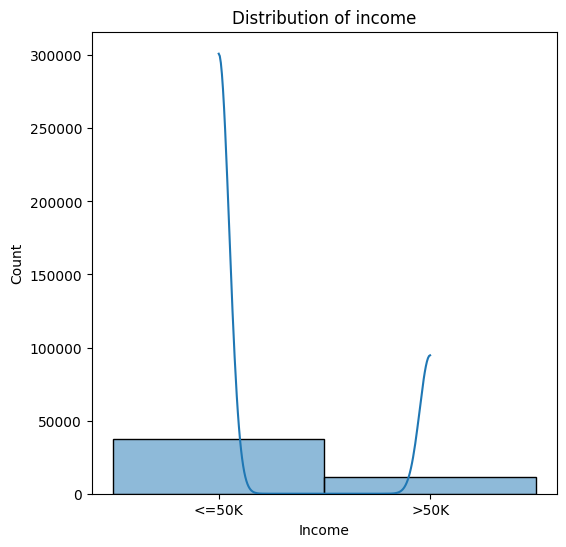

In [129]:
# Plotting a histogram of the income
plt.figure(figsize=(6, 6))
sns.histplot(df['income'], kde=True, edgecolor='black')
plt.title('Distribution of income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

### 3. Distribution of numerical variables

Plot the distribution of the numerical features.

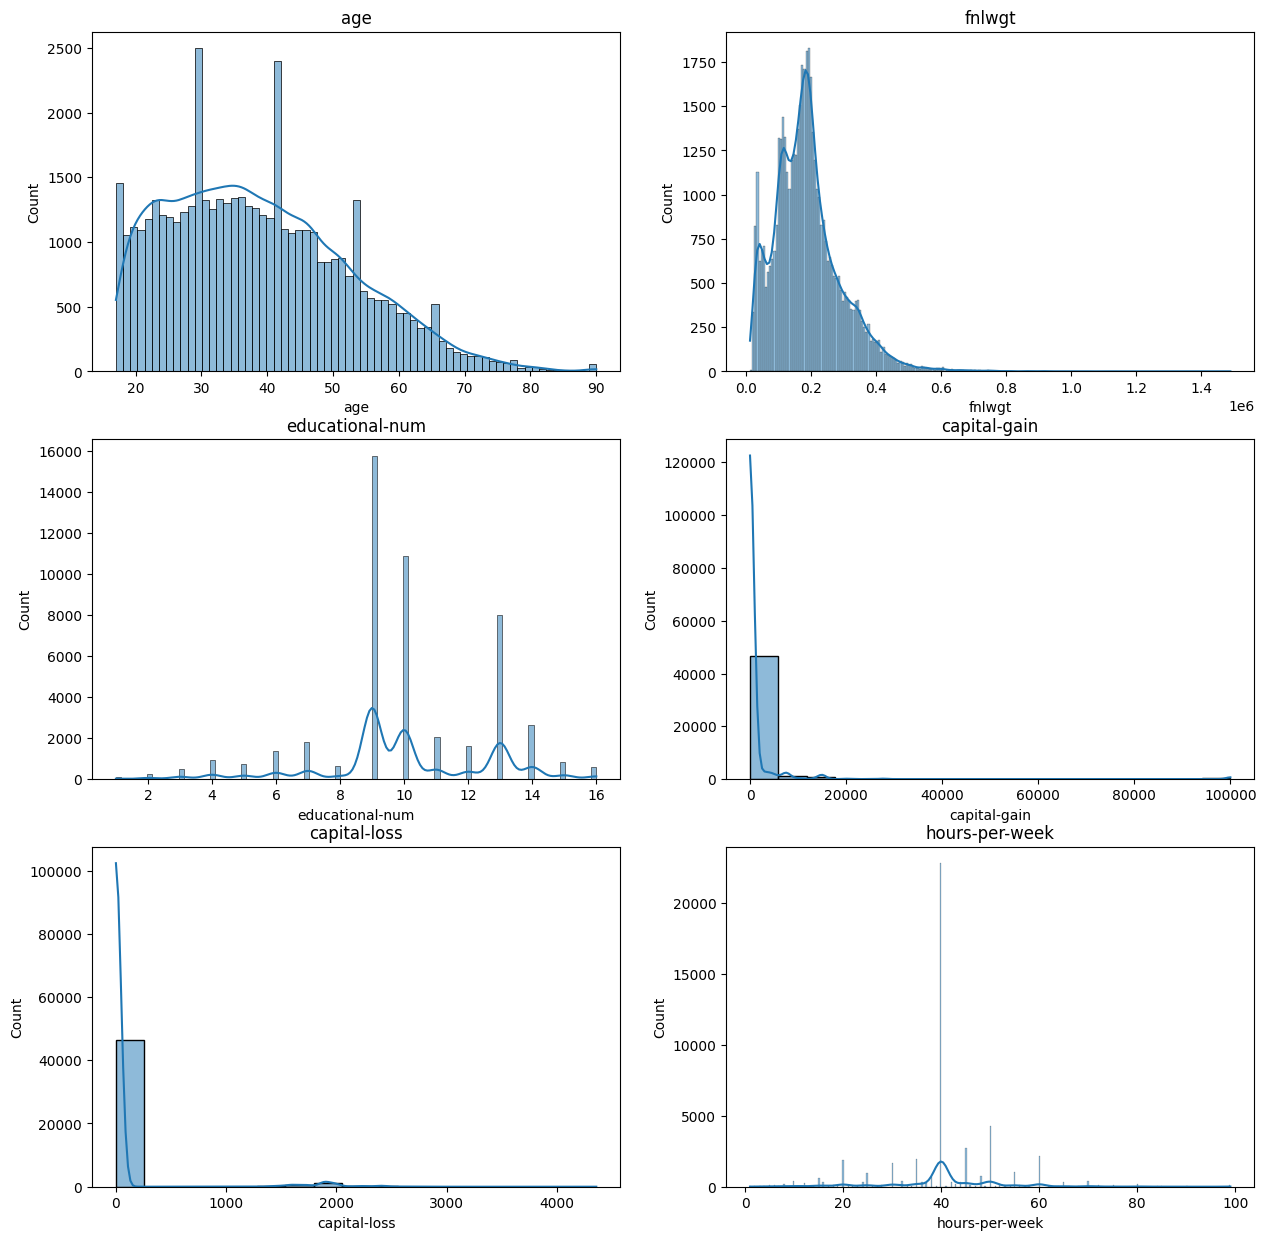

In [130]:
# Plotting the distibution of numerical values

# numerical columns
numerical_columns = df.dtypes[(df.dtypes=="int64")].index.values.tolist()

# Plotting the distribution of numerical features
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True, edgecolor='black')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Count')



plt.show()

### 4. Histogram of catagorical variables

Plot the histogram of the catagorical features.

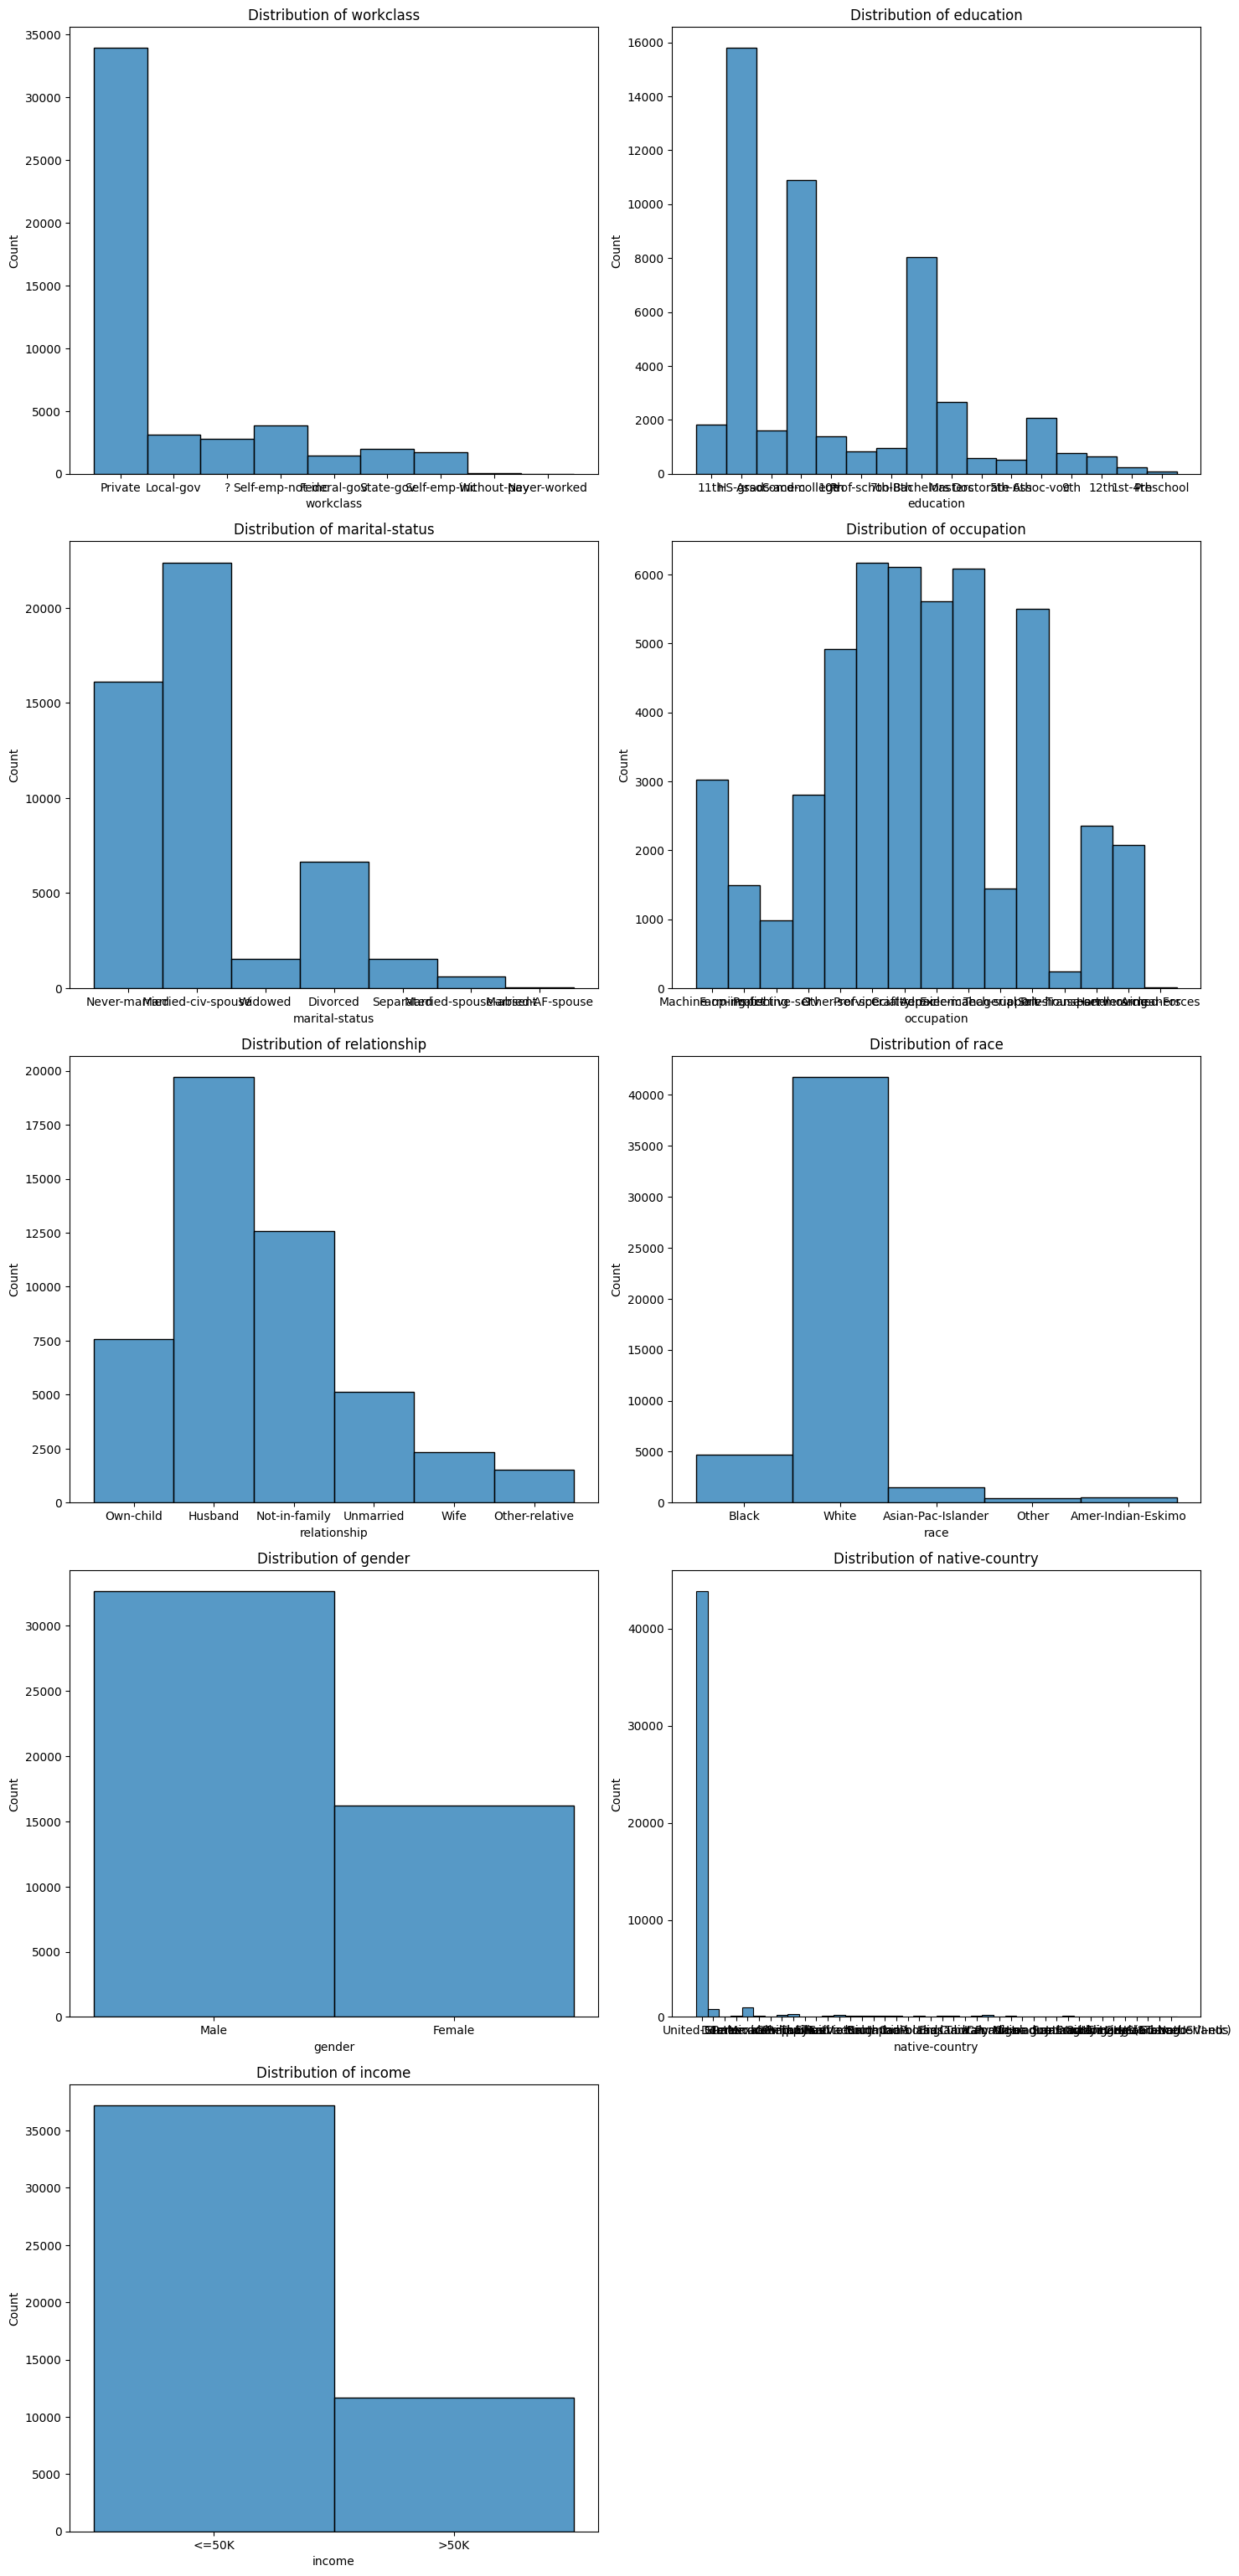

In [131]:
# Selecting only categorical columns for visualization
categorical_columns = df.select_dtypes(include='object').columns

# Plotting the distribution of categorical features
plt.figure(figsize=(15, 55))
for i, column in enumerate(categorical_columns, start=1):
    plt.subplot(len(categorical_columns), 2, i)
    sns.histplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Data Splitting

Split the dataset into 2 training and test datasets.

In [132]:
# Splitting the dataset into 2 training and test datasets.

X = df.drop('income', axis=1)  # Features
y = df['income']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39073, 14)
(39073,)
(9769, 14)
(9769,)


## Feature Engineering

### 1. Scaling numerical variables

In [133]:
scaler = StandardScaler()

# Fit and transform the scaler for the training data 
# Transform the test data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Display the scaled datasets
print("Scaled X_train:")
print(X_train.head())

print("\nScaled X_test:")
print(X_test.head())

Scaled X_train:
            age workclass    fnlwgt     education  educational-num  \
25947 -0.703170   Private -0.576568       HS-grad        -0.419293   
43254  0.903518   Private -0.253040       HS-grad        -0.419293   
19354 -0.849232   Private  0.380653       HS-grad        -0.419293   
13654 -1.506513   Private  0.815775          12th        -0.808328   
28834 -0.264982         ? -0.611278  Some-college        -0.030258   

              marital-status         occupation    relationship  \
25947  Married-spouse-absent  Machine-op-inspct   Not-in-family   
43254     Married-civ-spouse       Craft-repair         Husband   
19354          Never-married       Craft-repair       Own-child   
13654          Never-married              Sales  Other-relative   
28834               Divorced                  ?   Not-in-family   

                     race  gender  capital-gain  capital-loss  hours-per-week  \
25947               White  Female     -0.144398     -0.218186       -0.197238  

### 2. Catagorical variables encoding

Convert categorical columns into numerical columns using label encoding

In [134]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns.remove('income') 

le = LabelEncoder()

for column in categorical_columns:
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])

# Display the datasets with label-encoded categorical columns
print("Label Encoded X_train:")
print(X_train.head())

print("\nLabel Encoded X_test:")
print(X_test.head())

Label Encoded X_train:
            age  workclass    fnlwgt  education  educational-num  \
25947 -0.703170          4 -0.576568         11        -0.419293   
43254  0.903518          4 -0.253040         11        -0.419293   
19354 -0.849232          4  0.380653         11        -0.419293   
13654 -1.506513          4  0.815775          2        -0.808328   
28834 -0.264982          0 -0.611278         15        -0.030258   

       marital-status  occupation  relationship  race  gender  capital-gain  \
25947               3           7             1     4       0     -0.144398   
43254               2           3             0     4       1      0.869173   
19354               4           3             3     2       1     -0.144398   
13654               4          12             2     4       0     -0.144398   
28834               0           0             1     0       0     -0.144398   

       capital-loss  hours-per-week  native-country  
25947     -0.218186       -0.197238    

## Logistic Regression

Fit a logistic regression model on the training set. Test the model on the testing set. Evaluate the performance

Accuracy: 0.8241
Precision: 0.7125
Recall: 0.4520
Macro F1 Score: 0.7218


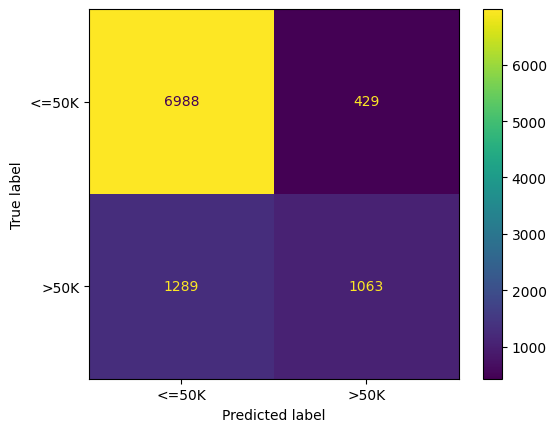

In [135]:
# Create a Logistic Regression model
logR = LogisticRegression(random_state=42, fit_intercept=True, max_iter=1000)

# Train using the training dataset
logR.fit(X_train, y_train)

# Predict over testing datasets
y_test_pred = logR.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, pos_label='>50K')
recall = recall_score(y_test, y_test_pred, pos_label='>50K')
f1_macro = f1_score(y_test, y_test_pred, average='macro')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(logR, X_test, y_test)

## Decision Tree

Fit a decision tree model on the training set. Use cross-validation in order to tune the hyperparameters of the decision tree model. Test the model on the testing set. Evaluate the performance

Accuracy: 0.8541
Precision: 0.7194
Recall: 0.6463
Macro F1 Score: 0.7932


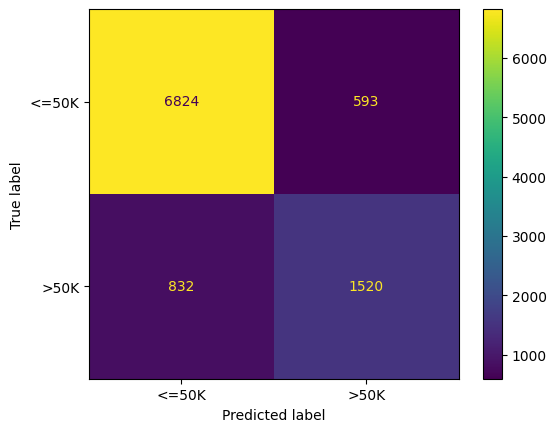

In [136]:
# Create a Decision Tree model
DecTree = DecisionTreeClassifier(criterion='gini', max_depth=4)

# Define hyperparameters to tune
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [5, 10, 15, 20, 50],
              'min_samples_leaf': [5, 10, 15, 20, 50]}

# Use RandomizedSearchCV for hyperparameter tuning
search = RandomizedSearchCV(DecTree, param_distributions=param_grid, scoring='f1_macro', cv=5, n_iter=100)
search.fit(X_train, y_train)

# Get the best hyperparameters
DecTree = search.best_estimator_

# Predict over testing datasets
y_test_pred = DecTree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, pos_label='>50K')
recall = recall_score(y_test, y_test_pred, pos_label='>50K')
f1_macro = f1_score(y_test, y_test_pred, average='macro')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(DecTree, X_test, y_test)

## Random Forest

Fit a random forest model on the training set. Use cross-validation in order to tune the hyperparameters of the decision tree model. Test the model on the testing set. Evaluate the performance

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/s

Accuracy: 0.8618
Precision: 0.7609
Recall: 0.6212
Macro F1 Score: 0.7978


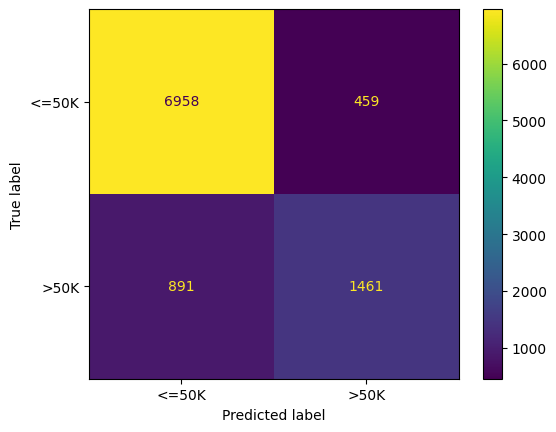

In [137]:
# Initialize Random Forest model with default hyperparameters
rf = RandomForestClassifier(criterion="gini", random_state=0)

# Create the param grid
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=400, num=8)],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV for hyperparameter tuning
search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, scoring='f1_macro', n_iter=10, cv=3, verbose=1, random_state=0)
search.fit(X_train, y_train)

# Get the best hyperparameters
rf = search.best_estimator_

# Predict over testing datasets
y_test_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, pos_label='>50K')
recall = recall_score(y_test, y_test_pred, pos_label='>50K')
f1_macro = f1_score(y_test, y_test_pred, average='macro')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)


## Gradient Boosting

Fit a gradient boosting model on the training set. Use cross-validation in order to tune the hyperparameters of the decision tree model. Test the model on the testing set. Evaluate the performance

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/s

Accuracy: 0.8537
Precision: 0.7216
Recall: 0.6390
Macro F1 Score: 0.7916


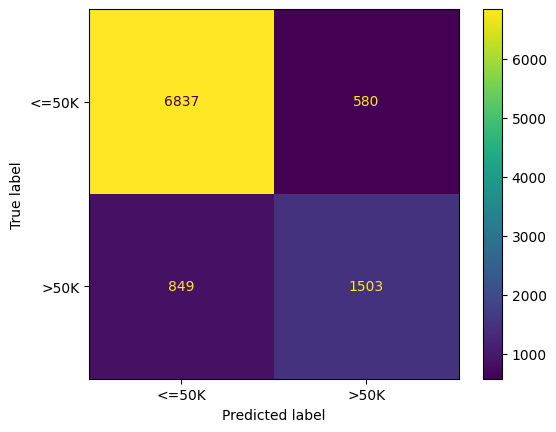

In [139]:
# Initialize Gradient Boosting model with default hyperparameters
gb = GradientBoostingClassifier(random_state=0)

# Define hyperparameters to tune
param_grid = { 'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 400, num = 8)],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'learning_rate': [0.1, 1],
               'subsample': [0.5, 0.7, 0.9]}

# Use RandomizedSearchCV for hyperparameter tuning
search = RandomizedSearchCV(estimator = gb, param_distributions = param_grid, scoring='f1_macro', n_iter = 10, cv = 3, verbose=1, random_state=0)
search.fit(X_train, y_train)

# Get the best hyperparameters
gb = search.best_estimator_

# Evaluate the best model on the testing set
y_test_pred = gb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, pos_label='>50K')
recall = recall_score(y_test, y_test_pred, pos_label='>50K')
f1_macro = f1_score(y_test, y_test_pred, average='macro')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)

## Chose one of the algorithms and explain why

After testing all the four algorithms, here's the performance results: 

### Performance: 

#### Logistic Regression:

- **Accuracy:** 0.8241
- **Macro F1 Score:** 0.7218
- **Confusion Matrix:** [6988, 429; 1289, 1063]

#### Decision Tree:

- **Accuracy:** 0.8541
- **Macro F1 Score:** 0.7932
- **Confusion Matrix:** [6824, 593; 832, 1520]

#### Random Forest:

- **Accuracy:** 0.8618
- **Macro F1 Score:** 0.7978
- **Confusion Matrix:** [6958, 459; 891, 1461] <br>
*NB: Some fits failed.*

#### Gradient Boosting:

- **Accuracy:** 0.8537
- **Macro F1 Score:** 0.7916
- **Confusion Matrix:** [6837, 580; 849, 1503] <br>
*NB: Some fits failed.*


### Main Results: 

- Random Forest and Decision Tree perform better than Logistic Regression in Accuracy and Macro F1 Score.
- Random Forest slightly outperforms Decision Tree regarding Macro F1 Score.
- Gradient Boosting has a Macro F1 somewhat close to Random Forest's but it requires a longer processing time.

### Final Decision: 

After comparing the models, Random Forest had the best results, with a high accuracy (0.8618) and a decent macro F1 score (0.7978). However, there were some problems as a few fits failed due to issues I couldn't resolve. Therefore, the Decision Tree model semmed to be a good alternative as it also had good results (accuracy of 0.8541 and a macro F1 score of 0.7932), a decent processing time, adn most importantly no failures. <br>
As a result, given the similar performance and the added benefit of no failures, I decided to choose the **Decision Tree** algorithm.